In [36]:

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [37]:
train_labels[0]


1

In [38]:
max([max(sequence) for sequence in train_data])

9999

In [39]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [40]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [41]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [42]:

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [43]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [44]:
model.compile(optimizer="adam", 
              loss="MSE",
              metrics=["accuracy"])

Validate the approach 

In [45]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [46]:
## model planned to train with 20 epoch with batch size of 256

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/20
59/59 [==============================] - 4s 56ms/step - loss: 0.1208 - accuracy: 0.8407 - val_loss: 0.0860 - val_accuracy: 0.8885
Epoch 2/20
59/59 [==============================] - 2s 37ms/step - loss: 0.0549 - accuracy: 0.9350 - val_loss: 0.0830 - val_accuracy: 0.8876
Epoch 3/20
59/59 [==============================] - 2s 36ms/step - loss: 0.0364 - accuracy: 0.9625 - val_loss: 0.0853 - val_accuracy: 0.8838
Epoch 4/20
59/59 [==============================] - 2s 37ms/step - loss: 0.0253 - accuracy: 0.9775 - val_loss: 0.0900 - val_accuracy: 0.8782
Epoch 5/20
59/59 [==============================] - 2s 33ms/step - loss: 0.0181 - accuracy: 0.9861 - val_loss: 0.0929 - val_accuracy: 0.8779
Epoch 6/20
59/59 [==============================] - 2s 36ms/step - loss: 0.0134 - accuracy: 0.9901 - val_loss: 0.0963 - val_accuracy: 0.8752
Epoch 7/20
59/59 [==============================] - 3s 52ms/step - loss: 0.0105 - accuracy: 0.9921 - val_loss: 0.0989 - val_accuracy: 0.8747
Epoch 8/20
59

In [47]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

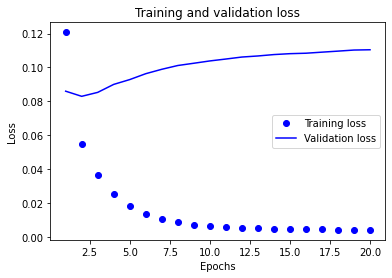

In [48]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

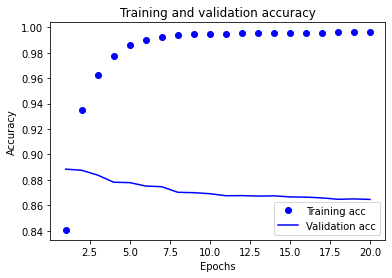

In [49]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [50]:
results= model.evaluate(x_test, y_test)


782/782 [==============================] - 5s 6ms/step - loss: 0.1220 - accuracy: 0.8529


In [51]:
results

[0.12198736518621445, 0.8528800010681152]

Combining all code together along with dropout layer

Epoch 1/20
59/59 [==============================] - 4s 50ms/step - loss: 3.4713 - accuracy: 0.8039 - val_loss: 2.4107 - val_accuracy: 0.8703
Epoch 2/20
59/59 [==============================] - 2s 38ms/step - loss: 1.6513 - accuracy: 0.9105 - val_loss: 0.9970 - val_accuracy: 0.8845
Epoch 3/20
59/59 [==============================] - 3s 56ms/step - loss: 0.5600 - accuracy: 0.9390 - val_loss: 0.2723 - val_accuracy: 0.8852
Epoch 4/20
59/59 [==============================] - 2s 39ms/step - loss: 0.1427 - accuracy: 0.9534 - val_loss: 0.1333 - val_accuracy: 0.8870
Epoch 5/20
59/59 [==============================] - 2s 35ms/step - loss: 0.0894 - accuracy: 0.9589 - val_loss: 0.1208 - val_accuracy: 0.8861
Epoch 6/20
59/59 [==============================] - 2s 36ms/step - loss: 0.0752 - accuracy: 0.9665 - val_loss: 0.1190 - val_accuracy: 0.8842
Epoch 7/20
59/59 [==============================] - 2s 39ms/step - loss: 0.0653 - accuracy: 0.9734 - val_loss: 0.1207 - val_accuracy: 0.8779
Epoch 8/20
59

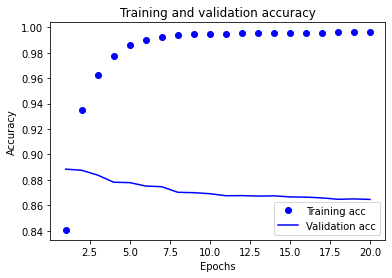

782/782 [==============================] - 3s 3ms/step - loss: 0.1303 - accuracy: 0.8602


[0.13029888272285461, 0.8601599931716919]

In [52]:
# Libraries required for setting up an environment

#####################################
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import regularizers
#####################################

# Neural network implementation using 1 layered approach with a single dropout layer
#######################################
model = keras.Sequential()
model.add(Dense(64,activation='tanh')) 
model.add(Dropout(0.5))
#kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01))
model.add(Dense(64,activation='tanh',kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
########################################

# Here for compilation we used optimizer "adagrad", mean squared error loss and accuracy metrics
########################################
model.compile(optimizer="adam",
              loss="MSE",
              metrics=["accuracy"])
########################################

## splitting the data
#######################################
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
#######################################

# Train a neural network
#####################################################
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))
#####################################################

# plotting the Training and Validation accuracy
####################################################
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
####################################################


# Evaluating the results
results = model.evaluate(x_test, y_test)
results